In [1]:
#outlier detection: https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-1-4ece5098b755

In [1]:
#Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_excel('covid_restaurant_full_post_profiling.xlsx')
df.head(10)

,rating,price,pickup,delivery,restaurant_reservation,total_restaurants_zip,Total_Reviews_Zip,Average_Rating_Zip,Average_Price_Zip,hotdogs,...,covid_high,covid_low,covid_moderate,covid_substantial,SizeRank,zillow_sfh_sale_price,redfin_sale_price,redfin_days_on_market,redfin_homes_sold,is_closed
0,2.5,1,0,0,0,13,703,3.807692,1.615385,0,...,0,0,1,0,388,335737,363211,39,4780,1
1,1.5,1,0,1,0,68,5612,3.169118,1.514706,1,...,0,0,0,1,3,461902,472842,26,124537,0
2,3.0,1,0,0,0,115,14069,3.508696,1.704348,0,...,0,0,1,0,48,393949,386701,30,27870,1
3,3.0,1,0,0,0,195,28703,3.784615,1.558974,0,...,0,0,1,0,48,393949,386701,30,27870,1
4,4.0,1,0,0,0,356,39868,3.737360,1.693820,0,...,0,0,0,1,135,389140,369527,49,8227,1
5,1.5,2,0,0,0,76,7888,3.664474,1.605263,0,...,0,0,1,0,28,190756,167109,31,21865,1
6,4.0,1,0,0,0,43,1374,3.546512,1.465116,0,...,0,0,1,0,28,190756,167109,31,21865,1
7,4.0,1,0,0,0,143,14177,3.325175,1.454545,0,...,0,0,0,1,3,461902,472842,26,124537,1
8,3.5,2,0,0,0,108,5466,3.370370,1.722222,0,...,0,0,1,0,179,203957,170770,63,4602,1
9,4.0,2,0,0,0,73,10137,3.301370,1.671233,0,...,0,0,0,1,3,461902,472842,26,124537,1


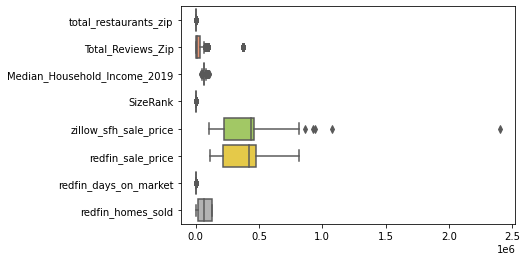

In [4]:
df_2 = df[['total_restaurants_zip', 'Total_Reviews_Zip', 'Median_Household_Income_2019','SizeRank','zillow_sfh_sale_price', 'redfin_sale_price', 'redfin_days_on_market', 'redfin_homes_sold']]
bp = sns.boxplot(data=df_2, orient="h", palette="Set2")

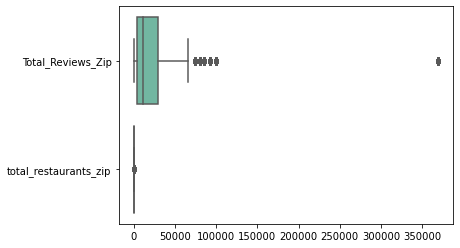

In [5]:
bp_1 = sns.boxplot(data=df[['Total_Reviews_Zip','total_restaurants_zip']], orient="h", palette="Set2")
#potential outlier for total_reviews_zip far right

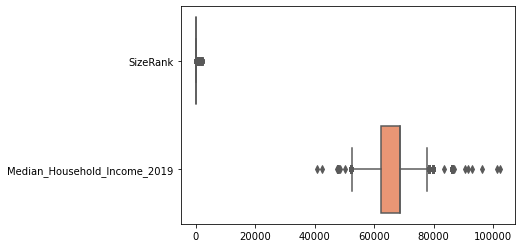

In [6]:
bp_2 = sns.boxplot(data=df[['SizeRank','Median_Household_Income_2019']], orient="h", palette="Set2")

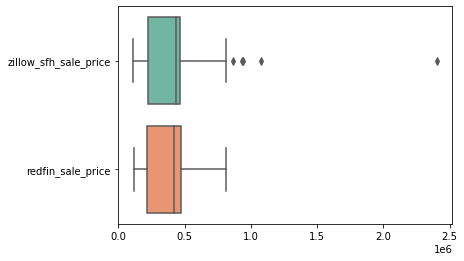

In [8]:
bp_3 = sns.boxplot(data=df[['zillow_sfh_sale_price','redfin_sale_price']], orient="h", palette="Set2")
#potential outlier for zillow_sfh_sale_price far right

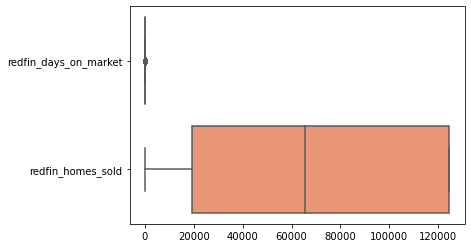

In [9]:
bp_4 = sns.boxplot(data=df[['redfin_days_on_market','redfin_homes_sold']], orient="h", palette="Set2")

In [12]:
#Z-score method
#Threshold 4 standard deviation or 99.9% of data values 

def z_score_method(df, variable_name):
    #Takes two parameters: dataframe & variable of interest as string
    columns = df.columns
    z = np.abs(stats.zscore(df))
    threshold = 4
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index = item
    for i, v in enumerate(z[:, index]):
        if v > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

In [13]:
outlier_total_restaurants_zip = z_score_method(df_2, 'total_restaurants_zip')
print(outlier_total_restaurants_zip)
#examined these records and they all belong to Las Vegas where there is a huge concentration of resturants (772) in this zipcode
#valid records so not removing

[10, 55, 89, 115, 189, 220, 346, 348, 356, 363, 398, 479, 492, 572, 591, 686, 699, 729, 780, 789, 812, 816, 857, 873, 885, 958, 962, 967, 1009, 1050, 1057, 1063, 1110, 1138, 1142, 1167, 1219, 1320, 1334, 1349, 1354, 1414, 1418, 1421, 1436, 1439, 1504, 1534, 1549, 1570, 1573, 1609, 1707, 1725, 1812, 1842, 1937, 1991, 1997, 2024, 2110, 2137, 2188, 2210, 2214, 2253, 2269, 2371, 2386, 2565, 2580, 2602, 2658, 2737, 2739, 2744, 2765, 2875, 2925, 2941, 2971, 2992, 3041, 3046, 3156, 3172, 3195, 3218, 3432, 3451, 3457, 3497, 3539, 3616, 3629, 3695, 3732, 3807, 3879, 3886, 3892, 3893, 4040, 4074, 4132, 4156, 4187, 4188, 4193, 4208, 4216, 4254, 4355, 4358, 4368, 4396, 4409, 4456, 4561, 4641, 4872, 4892, 4899, 4901, 4923, 4982, 4991, 4994, 5058, 5070, 5131, 5152, 5177, 5195, 5215, 5254, 5355, 5368, 5374, 5375, 5529, 5547, 5655, 5660, 5765, 5807, 5922, 5959, 5968, 6025, 6026, 6041, 6113, 6244, 6328, 6333, 6345, 6380, 6399, 6425, 6481, 6561, 6605, 6692, 6710, 6720, 6770, 6830, 6835, 6896, 6904, 6911

In [14]:
outlier_Total_Reviews_Zip = z_score_method(df_2, 'Total_Reviews_Zip')
print(outlier_Total_Reviews_Zip)
#similar to above, these all valid records, belonging to Las Vegas

[10, 55, 89, 115, 189, 220, 346, 348, 356, 363, 398, 479, 492, 572, 591, 686, 699, 729, 780, 789, 812, 816, 857, 873, 885, 958, 962, 967, 1009, 1050, 1057, 1063, 1110, 1138, 1142, 1167, 1219, 1320, 1334, 1349, 1354, 1414, 1418, 1421, 1436, 1439, 1504, 1534, 1549, 1570, 1573, 1609, 1707, 1725, 1812, 1842, 1937, 1991, 1997, 2024, 2110, 2137, 2188, 2210, 2214, 2253, 2269, 2371, 2386, 2565, 2580, 2602, 2658, 2737, 2739, 2744, 2765, 2875, 2925, 2941, 2971, 2992, 3041, 3046, 3156, 3172, 3195, 3218, 3432, 3451, 3457, 3497, 3539, 3616, 3629, 3695, 3732, 3807, 3879, 3886, 3892, 3893, 4040, 4074, 4132, 4156, 4187, 4188, 4193, 4208, 4216, 4254, 4355, 4358, 4368, 4396, 4409, 4456, 4561, 4641, 4872, 4892, 4899, 4901, 4923, 4982, 4991, 4994, 5058, 5070, 5131, 5152, 5177, 5195, 5215, 5254, 5355, 5368, 5374, 5375, 5529, 5547, 5655, 5660, 5765, 5807, 5922, 5959, 5968, 6025, 6026, 6041, 6113, 6244, 6328, 6333, 6345, 6380, 6399, 6425, 6481, 6561, 6605, 6692, 6710, 6720, 6770, 6830, 6835, 6896, 6904, 6911

In [17]:
outlier_Median_Household_Income_2019 = z_score_method(df_2, 'Median_Household_Income_2019')
print(outlier_Median_Household_Income_2019)
#valid records with median househouse income of 96k, 101k, 102K

[11382, 24115, 25832]


In [19]:
outlier_zillow_sfh_sale_price = z_score_method(df_2, 'zillow_sfh_sale_price')
print(outlier_zillow_sfh_sale_price)
#only record 12159 is true outlier that its sfh_sales_price is 2,405,436 where the next highest values are 1Mil and below...
#removed record 12159

[12159, 15681, 17702, 17901, 21915, 25832]
